In [150]:
import pandas as pd
import sklearn
from sklearn import preprocessing
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp

In [98]:
df = pd.read_csv('/Users/User1/ml-seed-data/clean_data.csv',header=0, sep=',')

In [ ]:
df

In [100]:
df = df.drop(labels=['team','opponent','roof','surface'], axis = 1)

In [101]:
dfs = df.drop(labels=['year','fga'], axis = 1)

In [119]:
x = dfs.values

In [120]:
from sklearn import preprocessing
normalized_x = preprocessing.scale(x)

In [121]:
dfs2=pd.DataFrame(normalized_x)

In [19]:
min_max_scaler = preprocessing.MinMaxScaler()

In [54]:
x_scaled = min_max_scaler.fit_transform(x)

In [55]:
dfs2 = pd.DataFrame(x_scaled)

In [122]:
dfs2.columns = ['week','ha','outdoors','dome','retractable_open','retractable_closed','grass','temp','wind','spread','ou','implied','points-per-game_currseason','points-per-game_last3','points-per-game_last1','points-per-game_lastseason','red-zone-scoring-attempts-per-game_currseason','red-zone-scoring-attempts-per-game_last3','red-zone-scoring-attempts-per-game_last1',	'red-zone-scoring-attempts-per-game_lastseason','red-zone-scoring-pct_currseason','red-zone-scoring-pct_last3','red-zone-scoring-pct_last1','red-zone-scoring-pct_lastseason','two-point-conversion-attempts-per-game_currseason','two-point-conversion-attempts-per-game_last3','two-point-conversion-attempts-per-game_last1','two-point-conversion-attempts-per-game_lastseason','two-point-conversions-per-game_currseason','two-point-conversions-per-game_last3',	'two-point-conversions-per-game_last1',	'two-point-conversions-per-game_lastseason',	'yards-per-game_currseason',	'yards-per-game_last3',	'yards-per-game_last1',	'yards-per-game_lastseason',	'plays-per-game_currseason',	'plays-per-game_last3',	'plays-per-game_last1',	'plays-per-game_lastseason',	'fourth-downs-per-game_currseason',	'fourth-downs-per-game_last3',	'fourth-downs-per-game_last1',	'fourth-downs-per-game_lastseason',	'fourth-down-conversion-pct_currseason',	'fourth-down-conversion-pct_last3',	'fourth-down-conversion-pct_last1',	'fourth-down-conversion-pct_lastseason',	'giveaways-per-game_currseason',	'giveaways-per-game_last3',	'giveaways-per-game_last1',	'giveaways-per-game_lastseason',	'penalties-per-game_currseason_x',	'penalties-per-game_last3_x',	'penalties-per-game_last1_x',	'penalties-per-game_lastseason_x',	'penalty-yards-per-game_currseason_x',	'penalty-yards-per-game_last3_x',	'penalty-yards-per-game_last1_x',	'penalty-yards-per-game_lastseason_x',	'opponent-points-per-game_currseason',	'opponent-points-per-game_last3',	'opponent-points-per-game_last1',	'opponent-points-per-game_lastseason',	'opponent-red-zone-scoring-attempts-per-game_currseason',	'opponent-red-zone-scoring-attempts-per-game_last3',	'opponent-red-zone-scoring-attempts-per-game_last1',	'opponent-red-zone-scoring-attempts-per-game_lastseason',	'opponent-red-zone-scoring-pct_currseason',	'opponent-red-zone-scoring-pct_last3',	'opponent-red-zone-scoring-pct_last1',	'opponent-red-zone-scoring-pct_lastseason',	'opponent-two-point-conversion-attempts-per-game_currseason',	'opponent-two-point-conversion-attempts-per-game_last3',	'opponent-two-point-conversion-attempts-per-game_last1',	'opponent-two-point-conversion-attempts-per-game_lastseason',	'opponent-two-point-conversions-per-game_currseason',	'opponent-two-point-conversions-per-game_last3',	'opponent-two-point-conversions-per-game_last1',	'opponent-two-point-conversions-per-game_lastseason',	'opponent-yards-per-game_currseason',	'opponent-yards-per-game_last3',	'opponent-yards-per-game_last1',	'opponent-yards-per-game_lastseason',	'opponent-plays-per-game_currseason',	'opponent-plays-per-game_last3',	'opponent-plays-per-game_last1',	'opponent-plays-per-game_lastseason',	'opponent-fourth-downs-per-game_currseason',	'opponent-fourth-downs-per-game_last3',	'opponent-fourth-downs-per-game_last1',	'opponent-fourth-downs-per-game_lastseason',	'opponent-fourth-down-conversion-pct_currseason',	'opponent-fourth-down-conversion-pct_last3',	'opponent-fourth-down-conversion-pct_last1',	'opponent-fourth-down-conversion-pct_lastseason',	'takeaways-per-game_currseason',	'takeaways-per-game_last3',	'takeaways-per-game_last1',	'takeaways-per-game_lastseason',	'penalties-per-game_currseason_y',	'penalties-per-game_last3_y',	'penalties-per-game_last1_y',	'penalties-per-game_lastseason_y',	'penalty-yards-per-game_currseason_y',	'penalty-yards-per-game_last3_y',	'penalty-yards-per-game_last1_y',	'penalty-yards-per-game_lastseason_y',	'points-per-game_ha',	'red-zone-scoring-attempts-per-game_ha',	'red-zone-scoring-pct_ha',	'two-point-conversion-attempts-per-game_ha',	'two-point-conversions-per-game_ha',	'yards-per-game_ha',	'plays-per-game_ha',	'fourth-downs-per-game_ha',	'fourth-down-conversion-pct_ha',	'giveaways-per-game_ha',	'penalties-per-game_ha',	'penalty-yards-per-game_ha',	'opponent-points-per-game_ha',	'opponent-red-zone-scoring-attempts-per-game_ha',	'opponent-red-zone-scoring-pct_ha',	'opponent-two-point-conversion-attempts-per-game_ha',	'opponent-two-point-conversions-per-game_ha',	'opponent-yards-per-game_ha',	'opponent-plays-per-game_ha',	'opponent-fourth-downs-per-game_ha',	'opponent-fourth-down-conversion-pct_ha',	'opponent-giveaways-per-game_ha',	'opponent-penalties-per-game_ha',	'opponent-penalty-yards-per-game_ha']

In [48]:
dfs2['temp'] = np.log(dfs2['temp'])

In [162]:
from scipy.stats import boxcox

hist = boxcox(dfs['wind'],-0.5)

plt.hist(dfs['wind'])

ValueError: Data must be positive.

In [ ]:
display(dfs2.corr())
pd.plotting.scatter_matrix(dfs2, figsize=(12, 12))
plt.show()

In [37]:
dfs2.to_csv('/Users/User1/ml-seed-data/full_data_normal.csv', sep='|')

In [68]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [123]:
from sklearn.linear_model import LinearRegression

#x = dfs2.drop('fga', axis=1)

x = dfs2

In [124]:
lm = LinearRegression()

lm.fit(x, df.fga)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [125]:
print('Estimated Intercept Coefficient:' , lm.intercept_)

Estimated Intercept Coefficient: 1.96214997006


In [126]:
print('Number of Coefficients:' , len(lm.coef_))

Number of Coefficients: 132


In [127]:
pd.DataFrame(list(zip(x.columns,lm.coef_)), columns=['features','estimatedCoefficients'])

,features,estimatedCoefficients
0,week,-1.991439e-02
1,ha,-5.319542e-03
2,outdoors,6.012292e-03
3,dome,7.171565e-03
4,retractable_open,-2.237139e-02
5,retractable_closed,2.740997e-02
6,grass,-2.072810e-02
7,temp,8.675200e-03
8,wind,3.515186e-03
9,spread,1.112193e+12


<function matplotlib.pyplot.show>

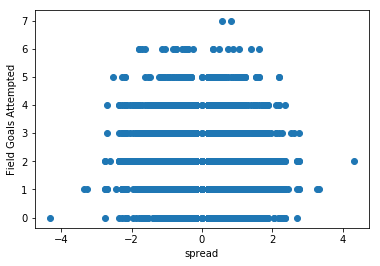

In [132]:
plt.scatter(dfs2['spread'],df['fga'])
plt.xlabel('spread')
plt.ylabel('Field Goals Attempted')
plt.show

<function matplotlib.pyplot.show>

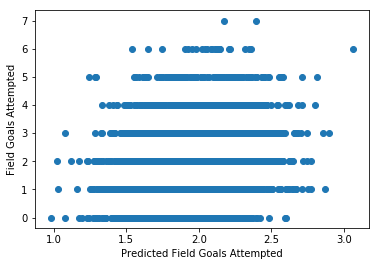

In [133]:
plt.scatter(lm.predict(x),df['fga'])
plt.ylabel('Field Goals Attempted')
plt.xlabel('Predicted Field Goals Attempted')
plt.show

In [137]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x, df['fga'], test_size=0.01, random_state=5)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3579, 132)
(3579,)
(37, 132)
(37,)


In [138]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(x_test)

In [110]:
print('Fit a model X_train, and calculate MSE with Y_train:', np.mean((y_train-lm.predict(x_train)) ** 2))
print('Fit a model X_train, and calculate MSE with X_test, Y_test:', np.mean((y_test-lm.predict(x_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 1.60675755022
Fit a model X_train, and calculate MSE with X_test, Y_test: 1.8515297531


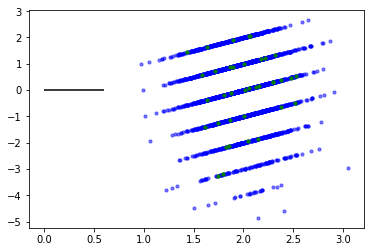

In [139]:
plt.scatter(lm.predict(x_train), lm.predict(x_train) - y_train, c='b', s=10, alpha = 0.5)
plt.scatter(lm.predict(x_test), lm.predict(x_test) - y_test, c='g', s=10)
plt.hlines(y=0, xmin=0, xmax=.6)

In [140]:
pre = pd.read_csv('/Users/User1/ml-seed-data/predict.csv',header=0, sep=',')

In [145]:
lm = LinearRegression()
lm.fit(x_train, y_train)
pred_train=lm.predict(x_train)
pred_test=lm.predict(pre)

In [146]:
df6=pd.DataFrame(pred_test)

In [147]:
df6

,0
0,-1.601040e+09
1,1.579886e+08
2,-2.480416e+09
3,7.003412e+07
4,-2.295596e+09
5,-2.421899e+09
6,-7.606095e+08
7,-6.079695e+08
8,-2.556332e+09
9,-1.289802e+09


In [148]:
df6.to_csv('/Users/User1/ml-seed-data/scores.csv', sep='|')